# Full Workbench disease network

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import os
import networkx as nx
from networkx.algorithms import bipartite
import itertools
# import gravis as gv

In [2]:
# get disease associations
disease_url = 'https://www.metabolomicsworkbench.org/rest/study/study_id/ST/disease'
disease_assoc = requests.get(disease_url)
disease_json = disease_assoc.json()

In [4]:
disease_assoc_df = pd.DataFrame.from_dict(disease_json, orient='index')

In [5]:
disease_assoc_df.to_csv('Disease_association_Workbench.csv')

In [4]:
disease_assoc_df = pd.read_csv('Disease_association_Workbench.csv', index_col=0)

In [5]:
disease_assoc_df['Disease'].value_counts()

Disease
Cancer                    496
Diabetes                  109
Obesity                    73
Environmental exposure     58
Malaria                    49
                         ... 
Cardiotoxicity              1
Liver failure               1
Valley fever                1
Cerebellar ataxia           1
Skin Disease                1
Name: count, Length: 214, dtype: int64

In [6]:
disease_assoc_df['Disease'].value_counts().head(10).reset_index()

,Disease,count
0,Cancer,496
1,Diabetes,109
2,Obesity,73
3,Environmental exposure,58
4,Malaria,49
5,Bacterial infection,47
6,Eye disease,44
7,Fatty liver disease,39
8,Heart disease,38
9,Tuberculosis,28


C:\Users\cw2019\AppData\Local\Temp\ipykernel_9616\3327851847.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Axes: xlabel='count', ylabel='Disease'>

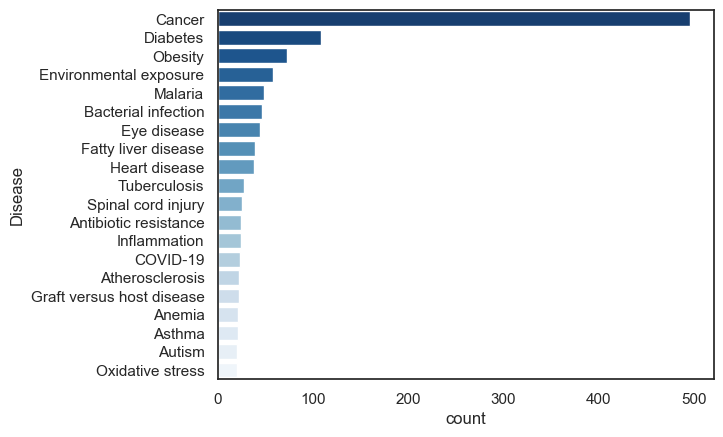

In [7]:
# plot top 10 diseases
sns.set(
    style='white'
)
sns.barplot(
    data=disease_assoc_df['Disease'].value_counts().head(20).reset_index(),
    x='count',
    y='Disease',
    palette='Blues_r'
)

## Download all study data - not needed
Only REFMET are required

In [8]:
named_met_url = 'https://www.metabolomicsworkbench.org/rest/study/study_id/ST/named_metabolites/'
named_met_dat = requests.get(named_met_url)
named_met_json = named_met_dat.json()
named_met_df = pd.DataFrame.from_dict(named_met_json, orient='index')

In [9]:
named_met_df.sort_values(by='num_metabolites', ascending=False).head()
# 

,study_id,study_title,institute,analysis_id,analysis_type,units,num_metabolites,details,species
3232,ST003090,Analysis of lipid profiles of N2A-Pz1-KO cells...,Rutgers University,AN005054,MS,Ion counts,993,Reversed phase POSITIVE ION MODE,Mus musculus
1570,ST001411,Plasma metabolites of lipid metabolism associa...,University of Michigan,AN002361,MS,peak area,991,HILIC POSITIVE ION MODE,Homo sapiens
376,ST000355,GC/MS and LC/MS metabolomics profiling for bre...,University of Hawaii,AN000581,MS,Peak Intensity,99,Reversed phase,Homo sapiens
1714,ST001658,Control of Topoisomerase II Activity and Chemo...,Johns Hopkins University,AN002707,MS,Peak Area,99,Reversed phase NEGATIVE ION MODE,Saccharomyces cerevisiae
2858,ST002731,Untargeted Multi-Omics of LNCaP Cell-line Trea...,Sharjah Institute for Medical Research,AN004428,MS,AU,99,Reversed phase POSITIVE ION MODE,Homo sapiens


In [10]:
# filter for at least 100 named mets
named_met_df['num_metabolites'] = named_met_df['num_metabolites'].astype(int)
named_met_df_filt = named_met_df[named_met_df['num_metabolites'] >= 100]

In [11]:
named_met_df_filt.sort_values(by='num_metabolites')

,study_id,study_title,institute,analysis_id,analysis_type,units,num_metabolites,details,species
965,ST000842,Muscle and plasma before and after exercise,University of Michigan,AN001356,MS,Counts,100,C18 NEGATIVE ION MODE/QTOF,Homo sapiens
1286,ST001143,Microbial depletion and ozone exposure - Lung ...,Harvard School of Public Health,AN001884,MS,area under the curve,100,HILIC LC-MS Negative,Mus musculus
3240,ST003101,"Parallel pheromonal, metabolite, and lipid ana...","Life Sciences Institute, The University of Bri...",AN005072,MS,Rel Abundance,100,Reversed phase POSITIVE ION MODE,Apis mellifera
1100,ST000956,Determine metabolomics signatures important fo...,University of Florida,AN001569,MS,peak height,100,Reversed phase NEGATIVE ION MODE,Homo sapiens
2128,ST002041,"Irradiation causes alterations of polyamine, p...",University of Colorado Anschutz Medical Campus,AN003321,MS,peak area top,100,Reversed phase POSITIVE ION MODE,Mus musculus
...,...,...,...,...,...,...,...,...,...
101,ST000114,SIRM Analysis of human P493 cells under hypoxi...,University of Kentucky,AN000193,MS,Peak area,4404,FTMS negative ion mode,Homo sapiens
3186,ST003040,MM.1S Myeloma tumor cells and tumors made by s...,Mainehealth,AN004987,MS,Corrected Peak intensities,6188,None (Direct infusion) UNSPECIFIED ION MODE,Homo sapiens
100,ST000114,SIRM Analysis of human P493 cells under hypoxi...,University of Kentucky,AN000192,MS,Peak area,9007,FTMS positive ion mode,Homo sapiens
130,ST000148,A549 13C-labeled Cell Study,University of Kentucky,AN000235,MS,normalized corrected Peak area,10352,ESI positive ion mode,Homo sapiens


In [12]:
named_met_df_filt['details'].value_counts()[0:13]

details
Reversed phase POSITIVE ION MODE               385
Reversed phase NEGATIVE ION MODE               268
HILIC POSITIVE ION MODE                        210
HILIC NEGATIVE ION MODE                        155
HILIC UNSPECIFIED ION MODE                     126
GC POSITIVE ION MODE                           114
C18 POSITIVE ION MODE                           45
C18 NEGATIVE ION MODE                           42
GC UNSPECIFIED ION MODE                         37
Reversed phase UNSPECIFIED ION MODE             32
None (Direct infusion) POSITIVE ION MODE        29
None (Direct infusion) UNSPECIFIED ION MODE     22
Normal phase NEGATIVE ION MODE                  18
Name: count, dtype: int64

In [13]:
studies = list(set(named_met_df_filt['study_id'].tolist()))
studies_assays = dict.fromkeys(studies)

In [14]:
len(studies)

1241

In [15]:
def get_refmets(study_id):
    mets_url = 'https://www.metabolomicsworkbench.org/rest/study/study_id/repl/metabolites'
    mets = requests.get(mets_url.replace('repl', study_id)).json()
    mets_df = pd.DataFrame.from_dict(mets, orient='index')
    refmets = set(mets_df['refmet_name'].tolist())
    return refmets

In [12]:
refmets_all = []
studies_without_refmets = []
# connections_all = []
for s in tqdm(studies):
    try:
        refmets_all.append(get_refmets(s))
    except KeyError:
        print(s)
        studies_without_refmets.append(s)
        continue
    except requests.JSONDecodeError:
        print(s)
        studies_without_refmets.append(s)
        continue
    # connections_all.append(get_refmets(s)[1])


  2%|▏         | 24/1194 [00:19<15:37,  1.25it/s]

ST001469


 13%|█▎        | 159/1194 [03:20<23:31,  1.36s/it]  

ST000363


 16%|█▌        | 190/1194 [03:49<14:49,  1.13it/s]

ST000359


 18%|█▊        | 211/1194 [05:06<5:07:01, 18.74s/it]

ST002094


 19%|█▊        | 221/1194 [05:14<21:33,  1.33s/it]  

ST000361


 29%|██▊       | 341/1194 [07:04<11:50,  1.20it/s]

ST000357


 29%|██▉       | 345/1194 [07:07<10:18,  1.37it/s]

ST001475


 39%|███▉      | 464/1194 [09:08<19:15,  1.58s/it]

ST001636


 51%|█████▏    | 613/1194 [11:38<07:12,  1.34it/s]

ST001449


 56%|█████▌    | 664/1194 [13:25<2:45:14, 18.71s/it]

ST000114


 64%|██████▍   | 766/1194 [15:14<10:50,  1.52s/it]  

ST001386


 85%|████████▌ | 1020/1194 [19:15<03:04,  1.06s/it]

ST001471


 96%|█████████▌| 1149/1194 [21:10<00:33,  1.33it/s]

ST001473


100%|██████████| 1194/1194 [22:03<00:00,  1.11s/it]


In [13]:
# remove studies without refmets from the study list
studies = [s for s in studies if s not in studies_without_refmets]

In [69]:
len(refmets_all)

198

## Create adjacency matrix

In [21]:
adj_mat.shape

NameError: name 'adj_mat' is not defined

In [15]:
# initialise empty numpy array
adj_mat = np.zeros((len(studies), len(studies)))

# fill in adjacency matrix
combinations = list(itertools.combinations(studies, 2))
for c in combinations:
    i = studies.index(c[0])
    j = studies.index(c[1])
    adj_mat[i, j] = len(refmets_all[i].intersection(refmets_all[j]))
    adj_mat[j, i] = len(refmets_all[i].intersection(refmets_all[j]))



In [16]:
adj_df = pd.DataFrame(adj_mat, index=studies, columns=studies)

In [17]:
# remove studies with no connection to anything
adj_df = adj_df[adj_df.sum(axis=1) > 0]

In [24]:
adj_df

,ST000017,ST002926,ST000714,ST001360,ST002195,ST002933,ST000676,ST000456,ST002524,ST002788,...,ST001674,ST001961,ST002567,ST000424,ST000916,ST002643,ST002471,ST001985,ST003012,ST001805
ST000017,0.0,110.0,121.0,20.0,20.0,31.0,18.0,55.0,41.0,36.0,...,1.0,220.0,35.0,85.0,26.0,53.0,181.0,99.0,76.0,24.0
ST002926,110.0,0.0,72.0,54.0,7.0,25.0,72.0,34.0,36.0,36.0,...,22.0,130.0,38.0,47.0,28.0,55.0,107.0,91.0,57.0,13.0
ST000714,121.0,72.0,0.0,9.0,7.0,26.0,9.0,24.0,30.0,29.0,...,1.0,103.0,21.0,52.0,18.0,30.0,92.0,55.0,48.0,18.0
ST001360,20.0,54.0,9.0,0.0,47.0,3.0,349.0,88.0,3.0,1.0,...,80.0,1.0,0.0,3.0,161.0,0.0,162.0,1.0,3.0,5.0
ST002195,20.0,7.0,7.0,47.0,0.0,1.0,51.0,18.0,1.0,1.0,...,1.0,1.0,0.0,2.0,54.0,0.0,46.0,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ST002643,53.0,55.0,30.0,0.0,0.0,12.0,0.0,20.0,30.0,21.0,...,0.0,67.0,49.0,34.0,0.0,0.0,34.0,58.0,34.0,7.0
ST002471,181.0,107.0,92.0,162.0,46.0,33.0,153.0,84.0,37.0,43.0,...,37.0,165.0,25.0,63.0,145.0,34.0,0.0,65.0,63.0,17.0
ST001985,99.0,91.0,55.0,1.0,1.0,13.0,0.0,23.0,32.0,28.0,...,1.0,128.0,42.0,52.0,1.0,58.0,65.0,0.0,44.0,6.0
ST003012,76.0,57.0,48.0,3.0,2.0,20.0,2.0,33.0,32.0,29.0,...,1.0,77.0,23.0,40.0,7.0,34.0,63.0,44.0,0.0,11.0


In [ ]:
# number of refmets per study
# remove empty refmets ''
refmets_all = [r for r in refmets_all if '' not in r]
refmets_count = [len(r) for r in refmets_all]

In [72]:
len(refmets_count)

198

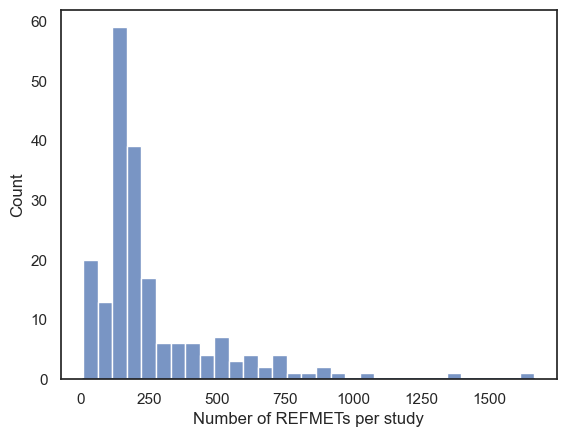

In [21]:
# mean number of connections
sns.set(
    style='white'

)
fig, (ax1) = plt.subplots(1, 1)

sns.histplot(
    data=refmets_count,
    ax=ax1,
    )
sns.kdeplot(
    data=refmets_count,
    cut=0,
    ax=ax1
)
plt.xlabel('Number of REFMETs per study')
plt.show()

In [68]:
refmets_count

LPC 16:0                            113
LPC 18:1                            104
Glutamic acid                       100
LPC 18:2                            100
LPC 18:0                             99
                                   ... 
Aminocaproic acid                     2
N-Acetyl-glucosamine 6-phosphate      2
Heptylic acid                         2
3-Hydroxyanthranilic acid             2
2-Hydroxyadenine                      2
Name: count, Length: 4109, dtype: int64

In [22]:
# most frequently occuring metabolites
all_refmets = list(itertools.chain(*refmets_all))
refmets_count = pd.Series(all_refmets).value_counts()
refmets_count = refmets_count[refmets_count > 1]


In [23]:
refmets_count.reset_index().sort_values(by='count', ascending=False).head(10)

,index,count
0,LPC 16:0,113
1,LPC 18:1,104
2,Glutamic acid,100
3,LPC 18:2,100
4,LPC 18:0,99
5,Glutamine,99
6,LPC 16:1,99
7,Tryptophan,98
8,Phenylalanine,98
9,PC 36:2,98


C:\Users\cw2019\AppData\Local\Temp\ipykernel_16080\950416088.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


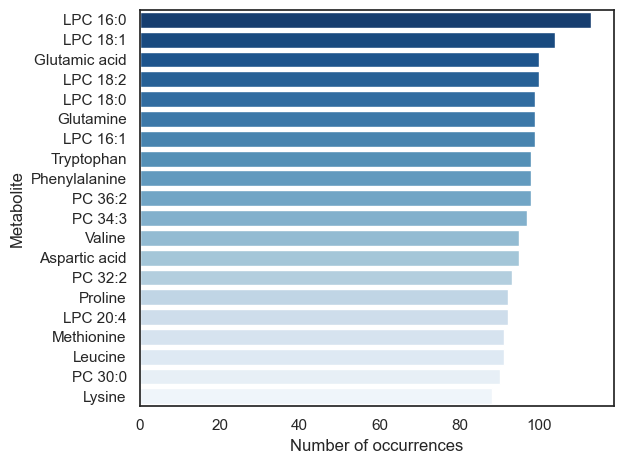

In [24]:
sns.barplot(
    data=refmets_count.reset_index().sort_values(by='count', ascending=False).head(20),
    orient='h',
    x='count',
    y='index',
    palette='Blues_r'
)
plt.xlabel('Number of occurrences') 
plt.ylabel('Metabolite')
plt.tight_layout()
plt.show()

In [76]:
named_met_df_filt

,study_id,study_title,institute,analysis_id,analysis_type,units,num_metabolites,details,species
1,ST000001,Fatb Induction Experiment (FatBIE),"University of California, Davis",AN000001,MS,Peak height,102,GCMS positive ion mode,Arabidopsis thaliana
2,ST000002,Intestinal Samples II pre/post transplantation,"University of California, Davis",AN000002,MS,Peak height,142,GCMS positive ion mode,Homo sapiens
3,ST000003,Metabolomic analysis of mouse embryonic fibrob...,"University of California, Davis",AN000003,MS,Peak height,51,LC/MS positive ion mode,Mus musculus
4,ST000004,Lipidomics studies on NIDDK / NIST human plasm...,LIPID MAPS,AN000004,MS,pmol/ml,107,Fatty acid/eicosanoid MS quantitative analysis...,Homo sapiens
5,ST000004,Lipidomics studies on NIDDK / NIST human plasm...,LIPID MAPS,AN000005,MS,pmol/ml,160,Phospholipid MS quantitative analysis with odd...,Homo sapiens
...,...,...,...,...,...,...,...,...,...
3275,ST003254,The impact of grass- and grain-finishing on me...,Duke University,AN005334,MS,Arbitrary Units,53,Reversed phase POSITIVE ION MODE,Bos taurus
3276,ST003254,The impact of grass- and grain-finishing on me...,Duke University,AN005335,MS,Arbitrary Units,168,Reversed phase NEGATIVE ION MODE,Bos taurus
3277,ST003254,The impact of grass- and grain-finishing on me...,Duke University,AN005336,MS,Arbitrary Units,97,HILIC NEGATIVE ION MODE,Bos taurus
3278,ST003262,A Covalent Creatine Kinase Inhibitor Ablates G...,"Northwestern University, Feinberg School of Me...",AN005346,MS,Peak area,162,HILIC UNSPECIFIED ION MODE,Homo sapiens


C:\Users\cw2019\AppData\Local\Temp\ipykernel_16080\3347404283.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


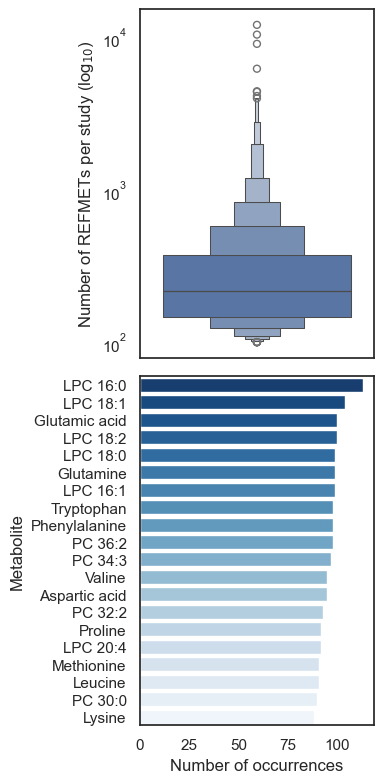

In [28]:
sns.set(
    style='white'

)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(4, 8))

# sns.histplot(
#     data=refmets_count,
#     ax=ax1,
#     )
# sns.kdeplot(
#     data=named_met_df_filt['num_metabolites'],
#     cut=0,
#     ax=ax1,
#     fill=True
# )
sns.boxenplot(
    data=named_met_df_filt['num_metabolites'],
    log_scale=True,
    ax=ax1
)
ax1.set_ylabel('Number of REFMETs per study (log$_{10}$)')

sns.barplot(
    data=refmets_count.reset_index().sort_values(by='count', ascending=False).head(20),
    orient='h',
    x='count',
    y='index',
    palette='Blues_r',
    ax=ax2

)
ax2.set_xlabel('Number of occurrences') 
ax2.set_ylabel('Metabolite')
plt.tight_layout()
plt.savefig('REFMET_top_metabs.png', dpi=300)
plt.show()

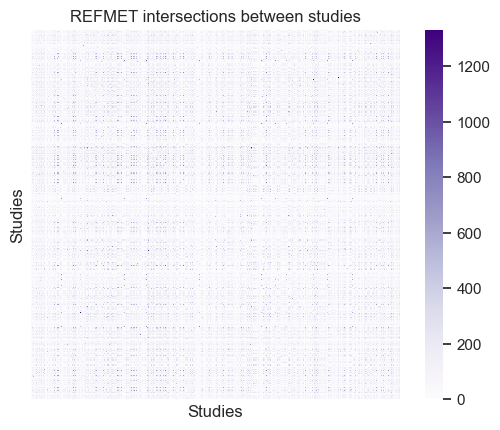

In [25]:
sns.set(
    style='white'
)
ax = sns.heatmap(
    data=adj_df,
    square=True,
    cmap='Purples',
    yticklabels=False,
    xticklabels=False
)

ax.set_title('REFMET intersections between studies')
ax.set_xlabel('Studies')
ax.set_ylabel('Studies')
plt.show()

In [29]:
adj_df_log = np.log1p(adj_df)

In [21]:
adj_df_log.head()

,ST001359,ST001958,ST002492,ST003144,ST001796,ST002671,ST002477,ST000753,ST003161,ST001963,...,ST001276,ST000759,ST003148,ST002758,ST001507,ST001304,ST002269,ST002206,ST001843,ST002493
ST001359,0.000000,3.178054,1.098612,3.637586,3.688879,5.056246,3.295837,5.087596,1.791759,5.087596,...,3.258097,5.023881,1.945910,0.693147,1.386294,3.401197,4.934474,1.386294,4.605170,4.543295
ST001958,3.178054,0.000000,0.000000,2.708050,2.833213,3.784190,0.000000,3.367296,0.000000,3.555348,...,2.484907,3.401197,0.000000,0.000000,0.000000,0.693147,3.218876,0.693147,2.639057,3.496508
ST002492,1.098612,0.000000,0.000000,4.356709,2.833213,1.609438,4.605170,3.465736,5.043425,1.098612,...,4.736198,4.007333,2.772589,4.343805,4.356709,4.804021,3.367296,4.836282,1.609438,5.365976
ST003144,3.637586,2.708050,4.356709,0.000000,3.850148,4.127134,4.499810,4.718499,4.430817,3.931826,...,4.948760,4.718499,2.833213,4.007333,3.871201,5.075174,4.343805,4.174387,4.094345,4.976734
ST001796,3.688879,2.833213,2.833213,3.850148,0.000000,3.737670,2.708050,3.988984,2.890372,3.433987,...,4.174387,3.988984,2.302585,3.135494,2.197225,3.988984,3.688879,2.944439,3.761200,4.189655


In [41]:
assay_details = pd.read_csv('Workbench_analysis_details_full_net_all.csv', index_col=0)

In [42]:
print(assay_details.shape)

(2122, 16)


In [32]:
assay_details.head()

,study_id,analysis_id,analysis_summary,analysis_type,chromatography system,column_name,chromatography_type,ms_instrument_name,ms_instrument_type,ms_type,ion_mode,nmr_instrument_type,nmr_experiment_type,spectrometer_frequency,nmr_solvent,units
ST001359,ST001359,AN002263,Reversed phase POSITIVE ION MODE,MS,Ultimate 3000,"Waters Acquity CSH C18 (100 x 2.1mm,1.7um)",Reversed phase,Thermo Q Exactive Orbitrap,Orbitrap,ESI,POSITIVE,NaN,NaN,NaN,NaN,Normalised peak area
ST001958,ST001958,AN003193,Reversed phase UNSPECIFIED ION MODE,MS,Thermo Dionex Ultimate 3000,"Thermo Acclaim 120 C18 (150 x 2.1mm,3um)",Reversed phase,Thermo Q Exactive Orbitrap,Orbitrap,ESI,UNSPECIFIED,NaN,NaN,NaN,NaN,normalized area values
ST002492_0,ST002492,AN004081,Reversed phase POSITIVE ION MODE,MS,Waters Acquity,"Waters ACQUITY UPLC BEH C18 (100 x 2.1mm,1.7um)",Reversed phase,Thermo Q Exactive Focus,Orbitrap,ESI,POSITIVE,NaN,NaN,NaN,NaN,Peak area
ST002492_1,ST002492,AN004082,Reversed phase POSITIVE ION MODE,MS,Waters Acquity,"Waters ACQUITY UPLC BEH C18 (100 x 2.1mm,1.7um)",Reversed phase,Thermo Q Exactive Focus,Orbitrap,ESI,POSITIVE,NaN,NaN,NaN,NaN,Peak area
ST002492_2,ST002492,AN004083,Reversed phase NEGATIVE ION MODE,MS,Waters Acquity,"Waters ACQUITY UPLC BEH C18 (100 x 2.1mm,1.7um)",Reversed phase,Thermo Q Exactive Focus,Orbitrap,ESI,NEGATIVE,NaN,NaN,NaN,NaN,Peak area


In [33]:
assay_details.chromatography_type.value_counts()


chromatography_type
Reversed phase             548
HILIC                      230
GC                          44
None (Direct infusion)      30
CE                          16
Unspecified                 15
Normal phase                10
Ion exchange                 4
Flow induction analysis      2
Ion Chromatography           2
Combined GC/LC               1
Reversed phase/HILIC         1
Ion pair                     1
Targeted IC                  1
Name: count, dtype: int64

In [43]:
# add as a column in original DF
assay_details['chromatography_type_filt'] = assay_details['chromatography_type'].apply(lambda x: x if x in ['Reversed phase', 'HILIC', 'GC', 'None (Direct infusion)', 'CE', 'Ion exchange', 'Combined'] else 'Other')

In [44]:
chrom_dict = assay_details.groupby('study_id').chromatography_type_filt.apply(list).to_dict()

In [45]:
chrom_dict = {k: v[0] if len(set(v)) == 1 else 'Combined' for k, v in chrom_dict.items() }

In [46]:
assay_cmap = dict(zip(set(chrom_dict.values()), sns.color_palette('tab10', n_colors=len(set(chrom_dict.values())))))

col_cols = []
for s in adj_df_log.columns:
    try:
        col_cols.append(assay_cmap[chrom_dict[s]])
    except KeyError:
        print(assay_details[assay_details['study_id'] == s]['chromatography_type'])

        col_cols.append('grey')

c:\Users\cw2019\AppData\Local\R\cache\R\basilisk\1.16.0\0\envs\py12\Lib\site-packages\seaborn\matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)
c:\Users\cw2019\AppData\Local\R\cache\R\basilisk\1.16.0\0\envs\py12\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\cw2019\AppData\Local\R\cache\R\basilisk\1.16.0\0\envs\py12\Lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
c:\Users\cw2019\AppData\Local\R\cache\R\basilisk\1.16.0\0\envs\py12\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\cw2019\AppData\Local\R\cache\R\basilisk\1.16.0\0

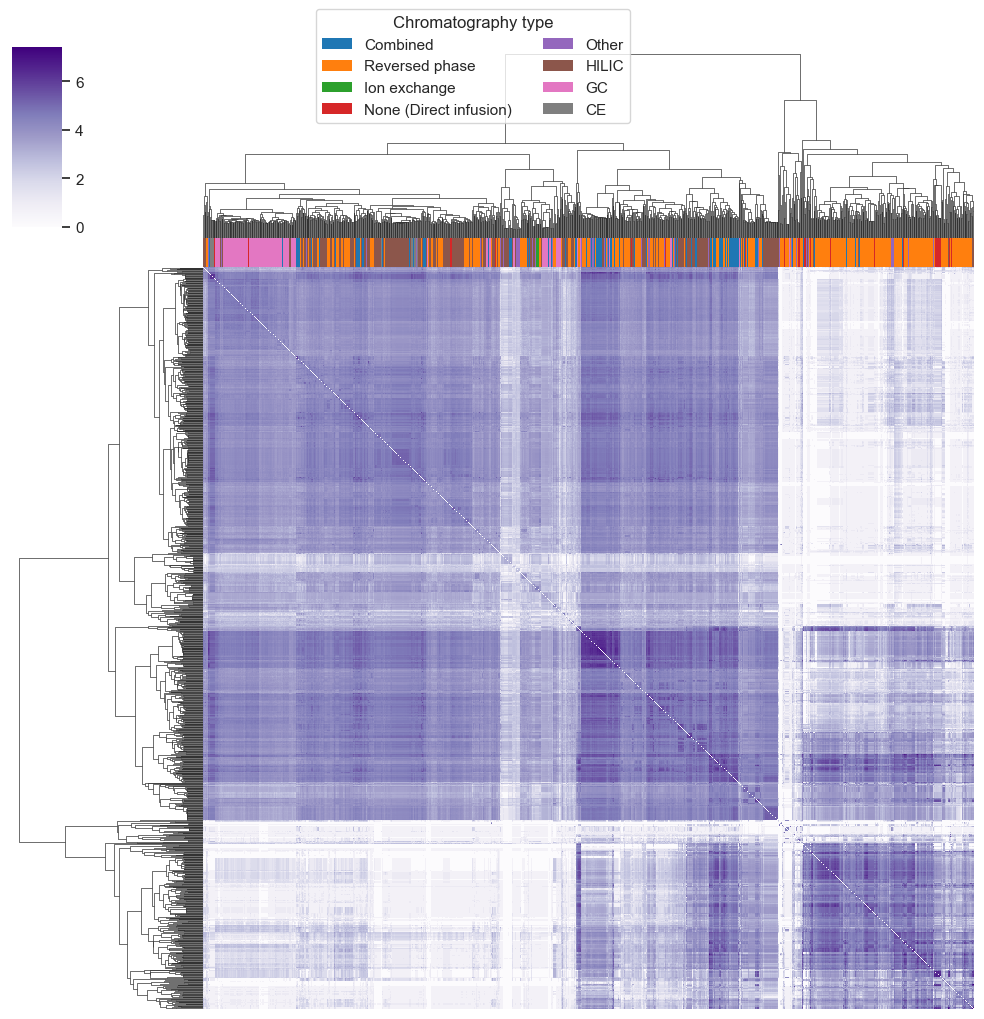

In [47]:
sns.set(
    style='white'
)
g = sns.clustermap(
    data=adj_df_log,
    square=True,
    cmap='Purples',
    yticklabels=False,
    xticklabels=False,
    col_colors=col_cols
)

# assay_cmap = dict(zip(assay_details_filt_chrom['chromatography_type'].unique(), sns.color_palette('tab10', n_colors=len(assay_details_filt_chrom['chromatography_type'].unique()))))
for label in assay_cmap.keys():
    g.ax_col_dendrogram.bar(0, 0, color=assay_cmap[label], label=label, linewidth=0)
l1 = g.ax_col_dendrogram.legend(title='Chromatography type', loc="center", ncol=2, bbox_to_anchor=(0.35, 0.89))

# # ax.set_title('REFMET intersections between studies')
# ax.set_xlabel('Studies')
# ax.set_ylabel('Studies')
# plt.savefig('Chromatography_type_clustering.png', dpi=300)
plt.show()

## Add chromatography node attributes

In [62]:
net = nx.from_pandas_edgelist(
    df=adj_mat_edgelist,
    source='index',
    target='variable',
    edge_attr='weight'
)
## Add chromatography node attributes

In [ ]:
# assign each node its properties from nodes_dict
nx.set_node_attributes(net, chrom_dict, name='chromatography_type')

In [65]:
# export network to graphml
nx.write_graphml(net, 'WorkBench_full_REFMET_overlap_chrom_all.graphml')